In [1]:
from mnspy import Ensamble, mallado_estructurado_triangular

# Análisis de Tensión Plana: Viga en Voladizo con Malla Estructurada

Este notebook presenta un ejemplo más avanzado de análisis por elementos finitos, donde se modela una viga en voladizo utilizando una **malla estructurada** de elementos triangulares (CST).

A diferencia del ejemplo anterior con solo dos elementos, aquí se utiliza una función auxiliar (`mallado_estructurado_triangular`) para generar automáticamente una malla regular de nodos y elementos, lo que permite un análisis más detallado y preciso.

**Problema:**

Analizar una viga en voladizo de 1.0 m de largo y 0.1 m de alto, empotrada en su extremo izquierdo y sometida a una carga puntual de 4000 N hacia abajo en el centro de su extremo derecho.

### Paso 1: Mallado y Definición del Problema

Se utiliza la función `mallado_estructurado_triangular` para crear la malla. Esta función devuelve un diccionario de nodos y una lista de elementos que definen la geometría y las propiedades del material.

In [2]:
# Generamos una malla con 4 filas y 20 columnas de "cajas", que se subdividen en triángulos.
nodos, elementos = mallado_estructurado_triangular(
    ancho=1.0, 
    altura=0.1, 
    n_filas=4, 
    n_columnas=20, 
    E=200E9, 
    espesor=0.12, 
    coef_poisson=0.3
)

### Paso 2: Aplicación de Condiciones de Frontera y Cargas

In [3]:
# Aplicamos la carga puntual en el nodo del extremo derecho y central (ID '105').
nodos['105'].agregar_fuerza_externa(-4000, 'y')

# Aplicamos la condición de empotramiento (apoyo fijo) en todos los nodos del borde izquierdo.
# Los IDs de estos nodos son '1', '22', '43', '64', '85'.
for id in ['1', '22', '43', '64', '85']:
    nodos[id].ajustar_grado_libertad('x', False)
    nodos[id].ajustar_grado_libertad('y', False)

### Paso 3: Ensamble y Visualización del Problema

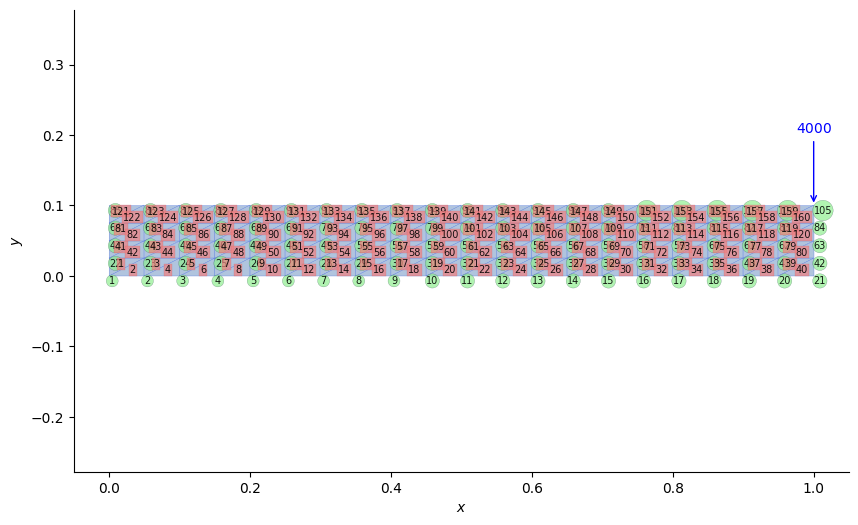

In [4]:
# Creamos el objeto Ensamble con la lista de elementos generados.
ens = Ensamble(elementos)

# Visualizamos la malla, los apoyos y las cargas aplicadas.
ens.diagrama_cargas(False, True, False, True)

### Paso 4: Solución del Sistema

In [5]:
# Se resuelve el sistema global de ecuaciones [K]{u} = {F} para encontrar todos los desplazamientos nodales
# y, posteriormente, las reacciones en los apoyos.
ens.solucionar_por_gauss_y_calcular_reacciones()

# Mostramos la solución (los desplazamientos de los primeros nodos como ejemplo).
ens.solucion()

Desplazamientos,Reacciones
$u_{1}=0$,$\color{blue}F_{1x}=29152.07772$
$v_{1}=0$,$\color{blue}F_{1y}=3189.656115$
$\color{blue}u_{23}=-1.599953275 \times 10^{-6}$,$\cancel{F_{23x}}$
$\color{blue}v_{23}=-1.815241932 \times 10^{-6}$,$\cancel{F_{23y}}$
$u_{22}=0$,$\color{blue}F_{22x}=20134.18001$
$v_{22}=0$,$\color{blue}F_{22y}=-5537.24495$
$\color{blue}u_{2}=-3.37357812 \times 10^{-6}$,$\cancel{F_{2x}}$
$\color{blue}v_{2}=-2.186656963 \times 10^{-6}$,$\cancel{F_{2y}}$
$\color{blue}u_{24}=-3.24430777 \times 10^{-6}$,$\cancel{F_{24x}}$
$\color{blue}v_{24}=-6.982206161 \times 10^{-6}$,$\cancel{F_{24y}}$


### Paso 5: Post-procesamiento y Visualización de Resultados

--- Deformada de la Viga ---


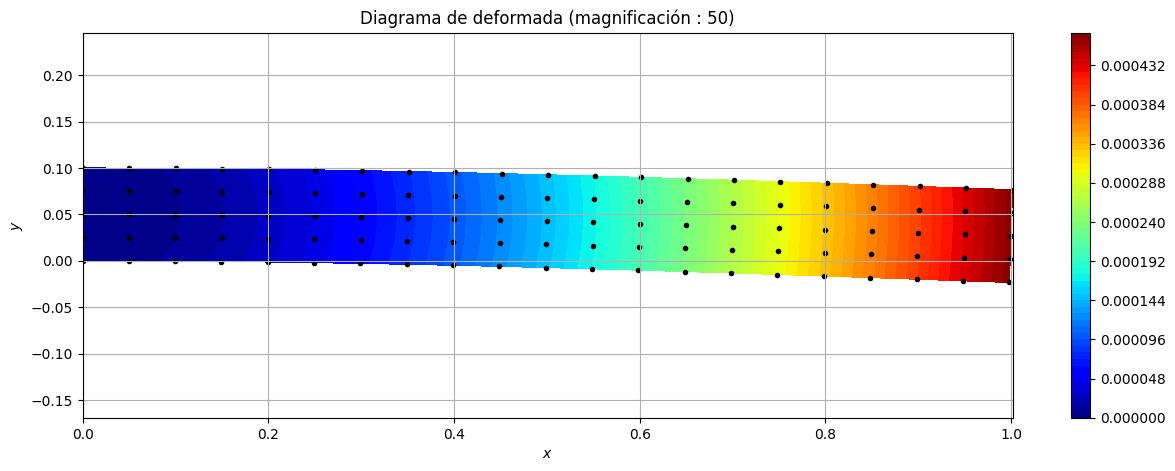

In [6]:
print("--- Deformada de la Viga ---")
# Graficamos la forma deformada de la viga. La deformación se magnifica para que sea visible.
ens.deformada(magnificacion=50)

--- Diagrama de Esfuerzo de Von Mises ---


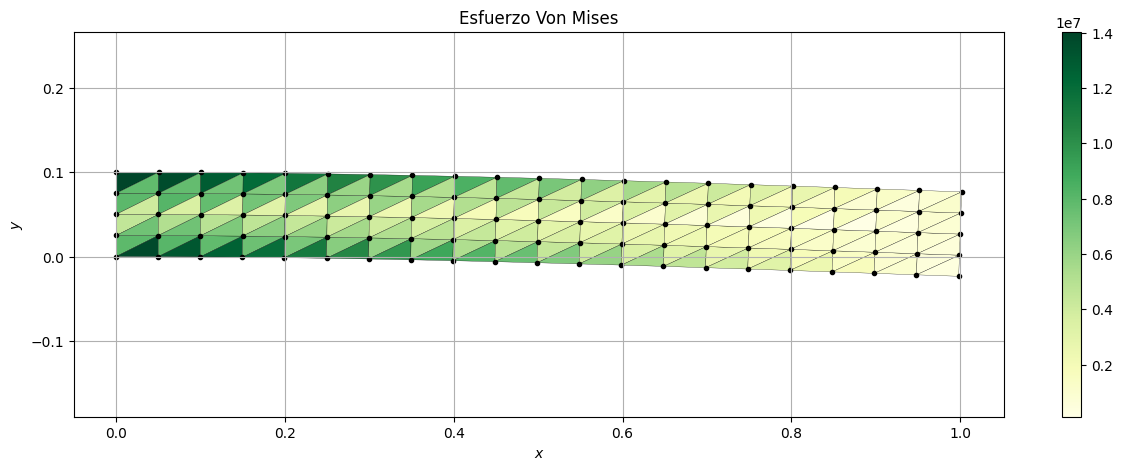

In [7]:
print("--- Diagrama de Esfuerzo de Von Mises ---")
# El esfuerzo de Von Mises es un valor escalar que se utiliza para predecir la falla en materiales dúctiles.
# Se observa una alta concentración de esfuerzos cerca del apoyo, como es de esperar.
ens.diagrama_de_esfuerzo_von_mises(50)

--- Diagrama de Esfuerzo Normal en X (σx) ---


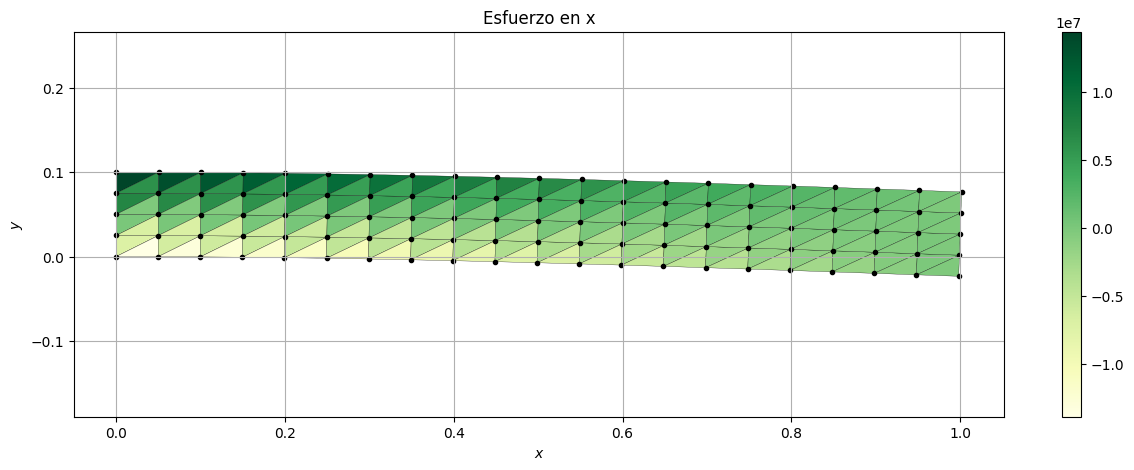

In [8]:
print("--- Diagrama de Esfuerzo Normal en X (σx) ---")
# Este es el esfuerzo de flexión. Se observa tensión (rojo, positivo) en la fibra superior
# y compresión (azul, negativo) en la fibra inferior.
ens.diagrama_de_esfuerzo_x(50)

--- Diagrama de Esfuerzo Normal en Y (σy) ---


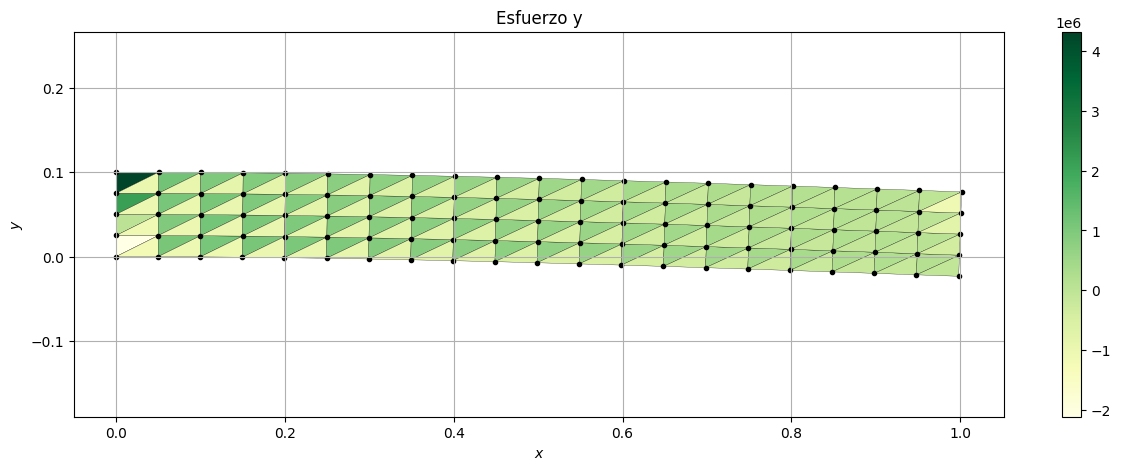

In [9]:
print("--- Diagrama de Esfuerzo Normal en Y (σy) ---")
# Este esfuerzo se debe principalmente al efecto de la carga puntual y la compresión cerca del apoyo.
# Es generalmente más pequeño que el esfuerzo de flexión (σx).
ens.diagrama_de_esfuerzo_y(50)

--- Diagrama de Esfuerzo Cortante (τxy) ---


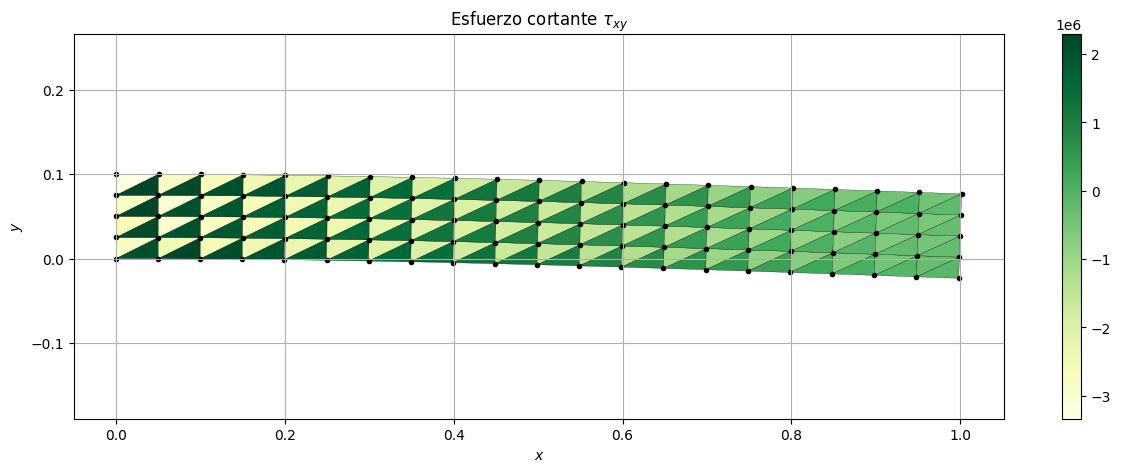

In [10]:
print("--- Diagrama de Esfuerzo Cortante (τxy) ---")
# El esfuerzo cortante es máximo cerca del eje neutro de la viga y en la zona del apoyo.
ens.diagrama_de_esfuerzo_cortante(50)